# Table of contents
1. [IMPORTATION DES DONNEES](#imports)
2. [VISUALISATION DES DONNEES ](#data)
3. [ANALYSE DE DONNEES](#variables)
    1. [Gestion des valeurs manquantes](#valeurs_m)
    2. [Analyse univariée](#analyse_u)
        1. [Analyse des variables catégorielles](#analyse_vacat)
        2. [Analyse des variables numeriques](#analyse_vanum)
    3. [Analyse Bi_variée](#analyse_b)
        1. [Création de Catégorie de variable](#variable_cat)
        2. [Analyse bi variée variables catégorielles](#Analyse_bi_variable_cat)
        3. [Analyse des variables numériques](#Analyse_variable_num)
4. [T-TEST hypothèses](#test_hypotheses)
5. [CREATION DE MODELES](#creation_modele)
6. [MODELS DE REGRESSIONS & PREDICTIONS](#Regression)
    1. [LogisticRegression](#Regression_logistique)
    2. [Random Forest Classifier](#Regression_RFC)
    3. [K-Nearest Neighbors](#Regression_knn)
    4. [GaussianNB](#Regression_gaussianNB)
    5. [SVC (support vector classifier)](#Regression_svc)
    6. [XG_BOOST](#xg_boost)
7. [MODELE_ACCURACY](#Accuracy)
8. [REPRESENTATION GRAPHIQUE DES MODELES : BOXPLOT](#Regression_Boxplot)
9. [MODELE RETENUE](#Modele_retenue)
10. [CONFUSION MATRIX](#Confusion_matrix)
11. [EXEMPLE DE PREDICTION](#exemple_prediction)
12. [FEATURE IMPORTANCE](#feature_importance)
13. [CREATION D'APPLICATION WEB](#api_web)
14. [DASHBOARD INTERACTIF](#Dashboard)

# 1_Importation <a name="imports"></a>

In [1]:
import pandas as pd

In [2]:
 df_exited = pd.read_csv("Churn Modelling.csv", sep = ",", decimal=',')

In [3]:
df = df_exited.copy()

# 2_Visualisation des données <a name="data"></a>

In [4]:
df

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0          2       0.00              1          1               1   
1          1   83807.86              1          0               1   
2          8  159660.80              3          1               0   
3          1       0.00              2          0               0   
4          2  125510.82              1          1               1   
...      ...        ...            ...        ...             ...   
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  
0           101348.88       1  
1           112542.58       0  
2           113931.57       1  
3            93826.63       0  
4            79084.10       0  
...               ...     ...  
9995         96270.64       0  
9996        101699.77       0  
9997         42085.58       1  
9998         92888.52       1  
9999         38190.78       0  

[10000 rows x 14 columns]

In [5]:
# df['NumOfProducts'].max()

# 3_Analyse de données <a name="variables"></a>

On a la variable CustomerId qui represente l'id du client (qui est unique), ensuite nous avons la variable prenom du client et son score de credit nommé CreditScore. La nationalité du Client son Genre et son age.
On a également la balance du compte (solde du compte). Le nombre de produit dont il dispose
(dispose t'il d'une carte ou pas). A t'il une carte de credit, est-il un membre actif ou pas
Estimation du salaire (combien il gagne en moyenne) et enfin la variable target (binaire) 
à savoir Reste-t-il ou pas !

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


variable de type catégorielle (Object: correte)

In [7]:
# df = df.convert_dtypes()
# df.dtypes
df['Surname'] = df['Surname'].astype("string")

In [8]:
df.dtypes.value_counts()

int64      9
float64    2
object     2
string     1
dtype: int64

<AxesSubplot:ylabel='None'>

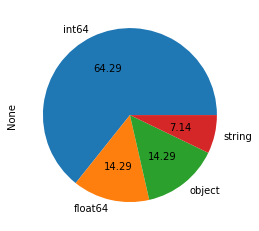

In [9]:
df.dtypes.value_counts().plot(kind='pie', autopct='%.2f')

In [10]:
df.shape

(10000, 14)

In [11]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             string
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [12]:
var_cat=['Geography', 'Gender', 'Tenure','NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']
var_num=['CreditScore', 'Age',  'Balance', 'EstimatedSalary']
print('les variables catégorielles sont:', var_cat)
print('les variables numeriques sont:', var_num)

les variables catégorielles sont: ['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']
les variables numeriques sont: ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']


## A_Gestion des valeurs manquantes <a name="valeurs_m"></a>

In [13]:
#### categorielles (remplecement par le mode)

In [14]:
# df['Geography'].fillna(df['Geography'].mode()[0],inplace=True)
# df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)

In [15]:
# numériques (remplecement par la median ou la moyenne)

In [16]:
# df['Age'].fillna(df['Age'].median(),inplace=True)
# df['Tenure'].fillna(df['Tenure'].median(),inplace=True)

In [17]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

#### Dans notre cas nous n'avons pas de valeurs manquantes. Nos données sont complètes. Aucune valeur manquante.

#### Rappel Gestion des valeurs manquantes : 
#### * supprimer les valeurs manquantes si on ne peut pas remplacer.
#### * pour les variables catégorielles on pourrait les remplacer par le mode de la variable.
#### * pour les variables numériques on pourrait les remplacer par la moyenne ou la médiane de la variable.

## B_Analyse univariée <a name="analyse_u"></a>

# *variable Target : "EXITED"*

In [18]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

###### Remarque : 
###### nous avons 7963 personnes ou clients qui sont susceptibles de ne pas quitter la banque contre 2037 qui sont susceptible de quitter la banque.

In [19]:
df['Exited'].value_counts(normalize=True)*100 # Normalize, je mets les taux entre 0 et 1 et je multiplie par 100

0    79.63
1    20.37
Name: Exited, dtype: float64

###### En terme de pourcentage environ 80% des clients sont susceptibles de ne pas quitter la banque contre 20% ce qui est plutôt une bonne nouvelle pour la banque meme si partir genère des pertes.

<AxesSubplot:title={'center':'Exited ou not_Exited'}>

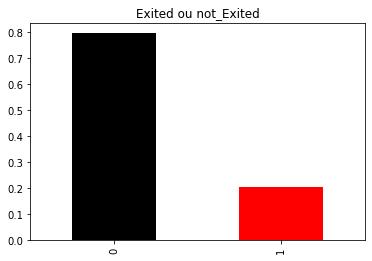

In [20]:
df['Exited'].value_counts(normalize=True).plot.bar(title='Exited ou not_Exited', color=['black', 'red'])

<AxesSubplot:ylabel='Exited'>

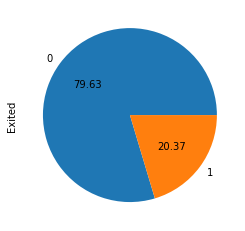

In [21]:
df['Exited'].value_counts().plot(kind='pie', autopct='%.2f')

In [22]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             string
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

## a_Analyse des variables catégorielles <a name="analyse_vacat"></a>

In [23]:
# ANALYSE des Variables categorielles à l'exception de la variable "EXITED"

In [24]:
var_cat

['Geography',
 'Gender',
 'Tenure',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'Exited']

### Geography

In [25]:
df['Geography'].value_counts(normalize=True)*100

France     50.14
Germany    25.09
Spain      24.77
Name: Geography, dtype: float64

<AxesSubplot:ylabel='Geography'>

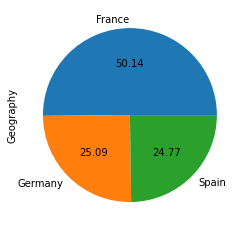

In [26]:
df['Geography'].value_counts(normalize=True).plot(kind='pie', autopct='%.2f')

<AxesSubplot:>

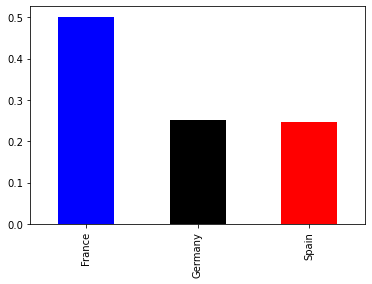

In [27]:
df['Geography'].value_counts(normalize=True).plot.bar(color=['blue','black','red'])

### Gender

In [28]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

<AxesSubplot:ylabel='Gender'>

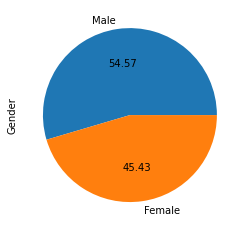

In [29]:
df['Gender'].value_counts().plot(kind='pie', autopct='%.2f')

In [30]:
import matplotlib.pyplot as plt

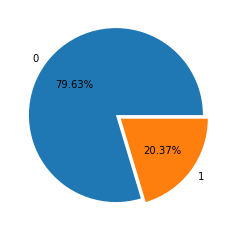

In [31]:
Exited_group = df.groupby("Exited").Exited.size()
plt.pie(Exited_group, labels=Exited_group.index, autopct="%.2f%%", explode=(0, 0.07))
plt.show()

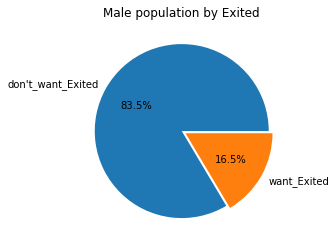

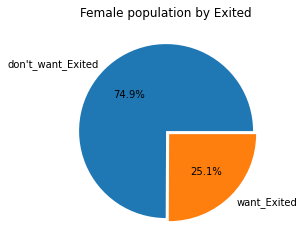

In [32]:
for gender in ["Male","Female"]:
    plt.pie(df[df.Gender==gender].groupby("Exited").Exited.count().sort_values(ascending=False), autopct="%1.1f%%", labels=["don't_want_Exited","want_Exited"], explode=[0,0.05])
    plt.title("%s population by Exited"%gender)
    plt.show()

<AxesSubplot:title={'center':'repartition par Genre'}>

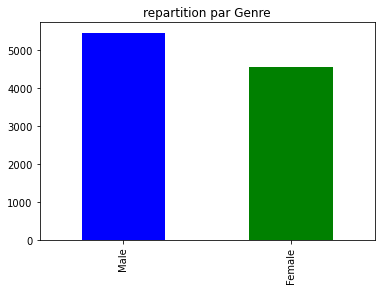

In [33]:
df['Gender'].value_counts().plot.bar(title='repartition par Genre', color=['blue', 'green'])

### Tenure

In [34]:
df['Tenure'].value_counts(normalize=True)*100

2     10.48
1     10.35
7     10.28
8     10.25
5     10.12
3     10.09
4      9.89
9      9.84
6      9.67
10     4.90
0      4.13
Name: Tenure, dtype: float64

<AxesSubplot:>

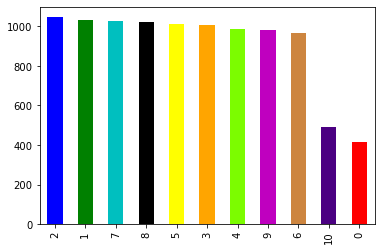

In [35]:
df['Tenure'].value_counts().plot.bar(color={'red','green','blue','yellow','indigo','black','orange','c','m','peru','lawngreen'} )

<AxesSubplot:ylabel='Tenure'>

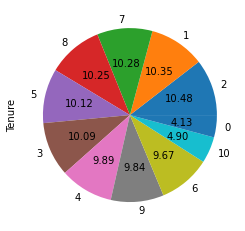

In [36]:
df['Tenure'].value_counts(normalize=True).plot(kind='pie', autopct='%.2f')

### NumOfProducts

<AxesSubplot:>

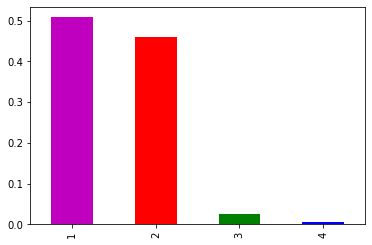

In [37]:
df['NumOfProducts'].value_counts(normalize=True).plot.bar(color=['m','r','g','b'])

### HasCrCard

In [38]:
df['HasCrCard'].value_counts(normalize=True)*100

1    70.55
0    29.45
Name: HasCrCard, dtype: float64

<AxesSubplot:ylabel='HasCrCard'>

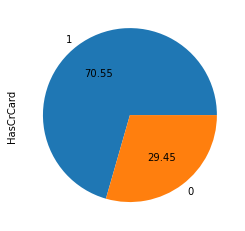

In [39]:
df['HasCrCard'].value_counts(normalize=True).plot(kind='pie', autopct='%.2f')

<AxesSubplot:>

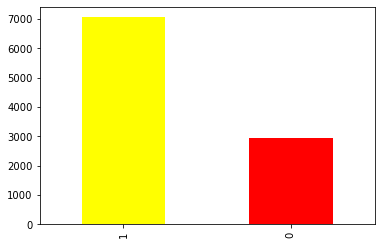

In [40]:
df['HasCrCard'].value_counts().plot.bar(color=['yellow','r'])

### IsActiveMember

In [41]:
df['IsActiveMember'].value_counts(normalize=True)*100

1    51.51
0    48.49
Name: IsActiveMember, dtype: float64

<AxesSubplot:>

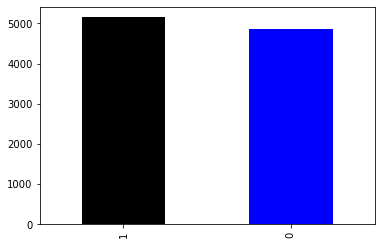

In [42]:
df['IsActiveMember'].value_counts().plot.bar(color=['black','b'])

## b_Analyse des variables numériques <a name="analyse_vanum"></a> 

In [43]:
var_num=['RowNumber', 'CustomerId', 'CreditScore', 'Age',  'Balance', 'EstimatedSalary']
df[var_num].describe()

RowNumber    CustomerId   CreditScore           Age        Balance  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000   10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800   76485.889288   
std     2886.89568  7.193619e+04     96.653299     10.487806   62397.405202   
min        1.00000  1.556570e+07    350.000000     18.000000       0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000       0.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000   97198.540000   
75%     7500.25000  1.575323e+07    718.000000     44.000000  127644.240000   
max    10000.00000  1.581569e+07    850.000000     92.000000  250898.090000   

       EstimatedSalary  
count     10000.000000  
mean     100090.239881  
std       57510.492818  
min          11.580000  
25%       51002.110000  
50%      100193.915000  
75%      149388.247500  
max      199992.480000

###### regarder les outlayers
###### quand il y a des écarts cela se traduit soit par la présence de valeurs abérrentes soit par les outlayers qui sont présents. (il faudrait donc les traiter). Ici dans notre cas il n'y pas grande différence donc ca va. toujours regarder l'écart entre mean et 50%, min et le max de chaque variable. 

# visualisation des variables quantitatives
## importataion des packages de visualisations

In [44]:
import matplotlib.pyplot as plt 
import seaborn as sns

### CreditScore

C:\Users\mouss\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


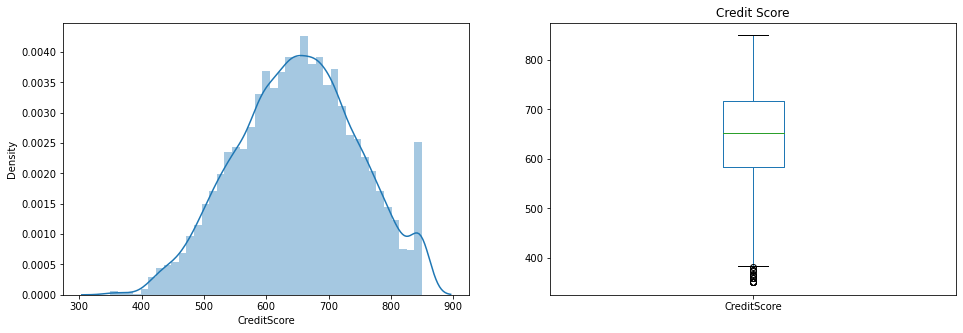

In [45]:
plt.figure(1) # je crée une figure 

# la premiere sous figure
plt.subplot(121)
sns.distplot(df['CreditScore'])

# la seconde sous figure
plt.subplot(122)
df['CreditScore'].plot.box(figsize=(16,5))
plt.title('Credit Score')

plt.show()

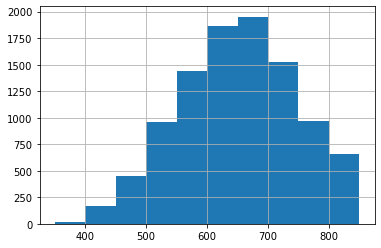

In [46]:
df.CreditScore.hist()
plt.show()

In [47]:
# pour la moustache on a un groupe de valeurs aberrentes, 
# un groupe dont le Credit Score est inférieur à 400

### EstimatedSalary

C:\Users\mouss\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


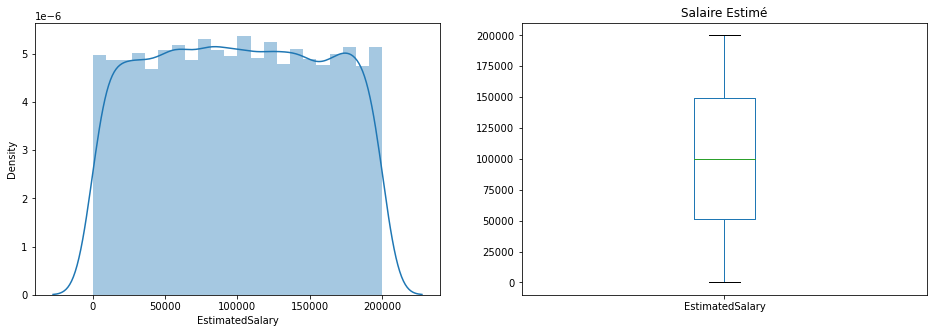

In [48]:
plt.figure(1) # je crée une figure 

# la premiere sous figure
plt.subplot(121)
sns.distplot(df['EstimatedSalary'])

# la seconde sous figure
plt.subplot(122)
df['EstimatedSalary'].plot.box(figsize=(16,5))
plt.title('Salaire Estimé')

plt.show()

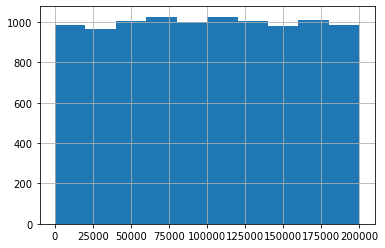

In [49]:
df.EstimatedSalary.hist()
plt.show()

### Age

C:\Users\mouss\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


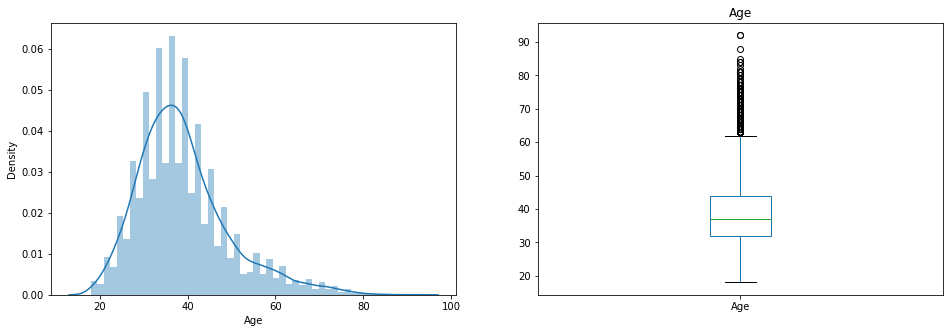

In [50]:
plt.figure(1) # je crée une figure 

# la premiere sous figure
plt.subplot(121)
sns.distplot(df['Age'])

# la seconde sous figure
plt.subplot(122)
df['Age'].plot.box(figsize=(16,5))
plt.title('Age')

plt.show()

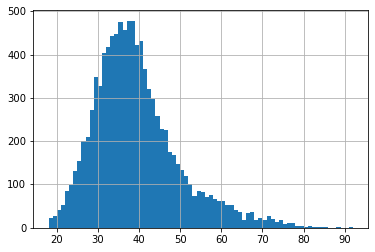

In [51]:
df.Age.hist(bins = df.Age.max()-df.Age.min())
plt.show()

### Balance

C:\Users\mouss\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


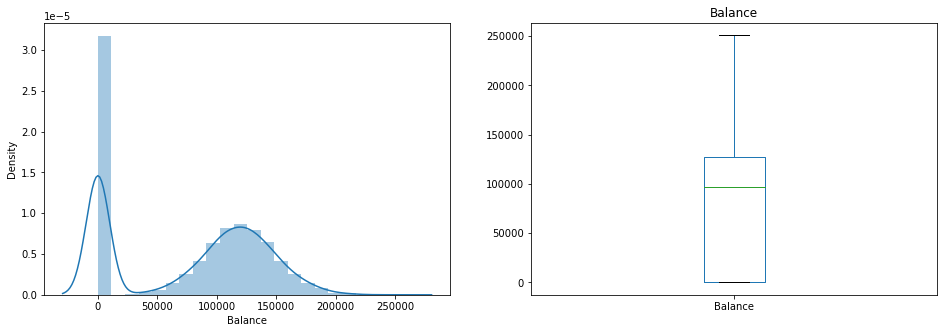

In [52]:
plt.figure(1) # je crée une figure 

# la premiere sous figure
plt.subplot(121)
sns.distplot(df['Balance'])

# la seconde sous figure
plt.subplot(122)
df['Balance'].plot.box(figsize=(16,5))
plt.title('Balance')

plt.show()

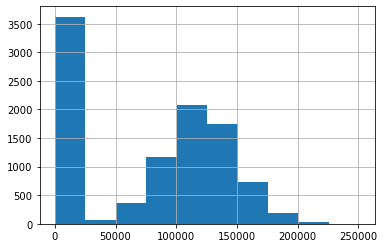

In [53]:
df.Balance.hist()
plt.show()

#### QUELQUES REPRESENTATIONS GRAPHIQUES STATISTIQUES

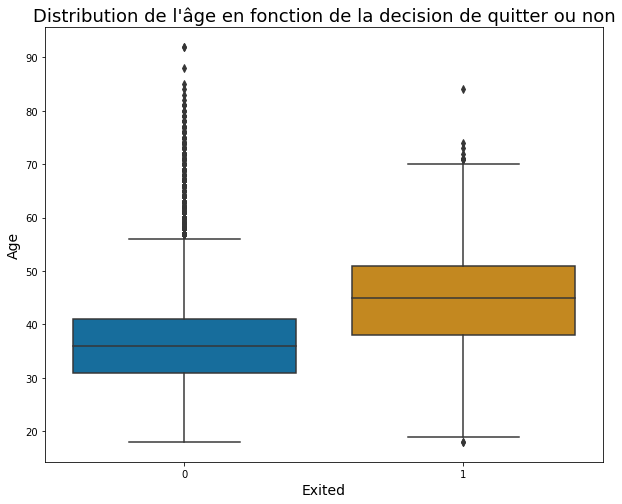

In [54]:
plt.figure(figsize=(10, 8))
# make boxplot with Seaborn
sns.boxplot(y='Age', x='Exited', 
                 data=df, 
                 palette="colorblind")
# Set labels and title
plt.ylabel("Age", size=14)
plt.xlabel("Exited", size=14)
plt.title("Distribution de l'âge en fonction de la decision de quitter ou non", size=18)
plt.savefig("boxplot_AGE_PREMATURE.png")

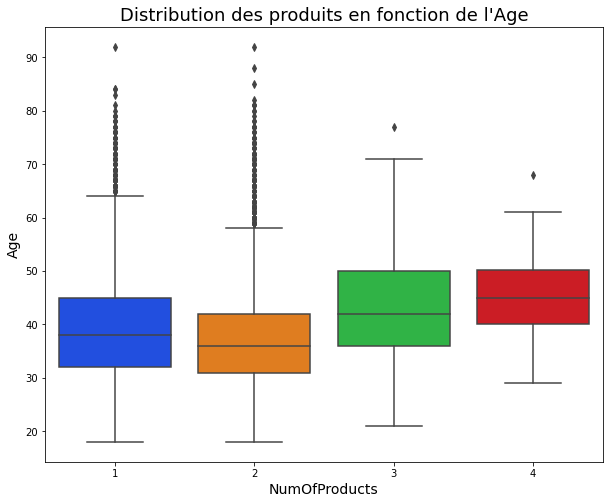

In [55]:
plt.figure(figsize=(10, 8))
# make boxplot with Seaborn
sns.boxplot(y='Age', x='NumOfProducts', 
                 data=df, 
                 palette="bright")
# Set labels and title
plt.ylabel("Age", size=14)
plt.xlabel("NumOfProducts", size=14)
plt.title("Distribution des produits en fonction de l'Age", size=18)
plt.savefig("boxplot_AGE_PREMATURE.png")

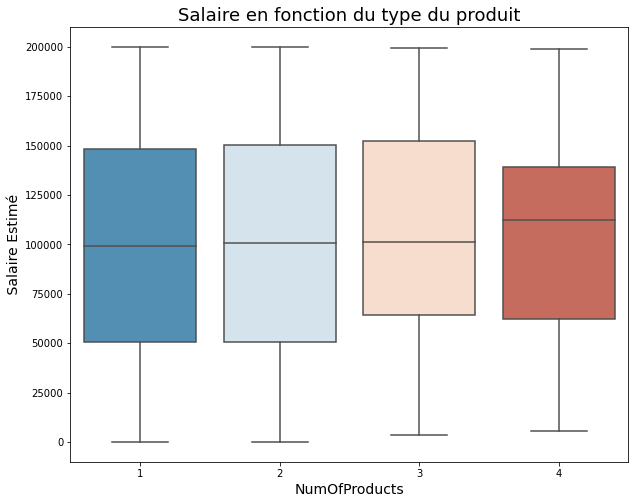

In [56]:
plt.figure(figsize=(10, 8))
# make boxplot with Seaborn
sns.boxplot(y='EstimatedSalary', x='NumOfProducts', 
                 data=df, 
                 palette="RdBu_r")
# Set labels and title
plt.ylabel(" Salaire Estimé ", size=14)
plt.xlabel("NumOfProducts", size=14)
plt.title("Salaire en fonction du type du produit", size=18)
plt.savefig("boxplot_AGE_PREMATURE.png")

In [57]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             string
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

#### RECAPITULATIF DES GRAPHIQUES

### variables float

C:\Users\mouss\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mouss\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


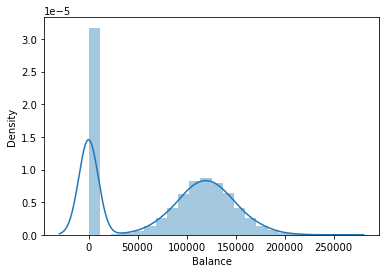

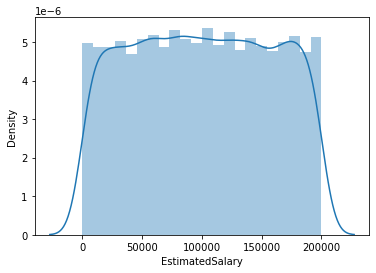

In [58]:
for col in df.select_dtypes('float'):
    plt.figure()
    sns.distplot(df[col])

### variables Int64

C:\Users\mouss\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mouss\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mouss\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

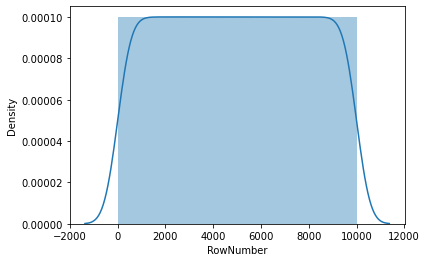

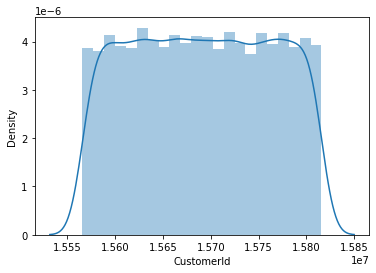

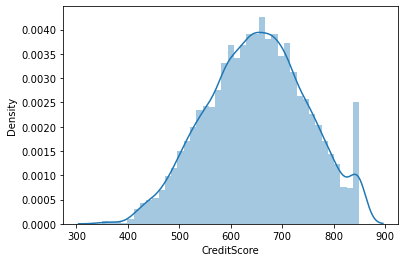

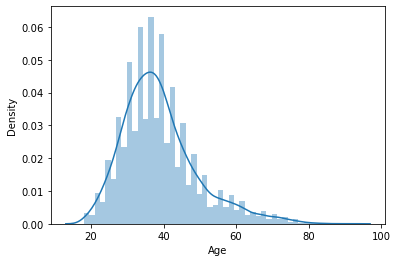

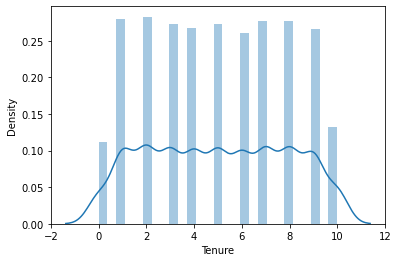

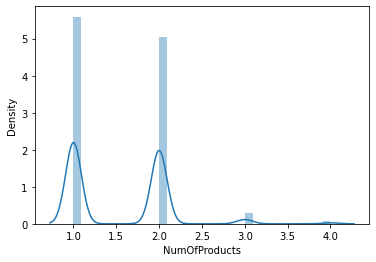

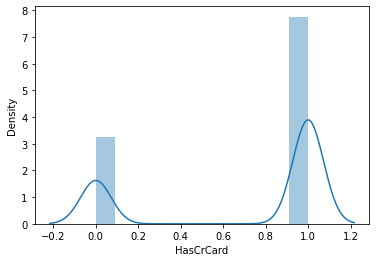

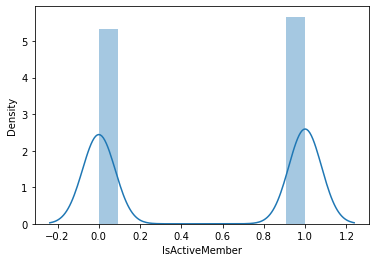

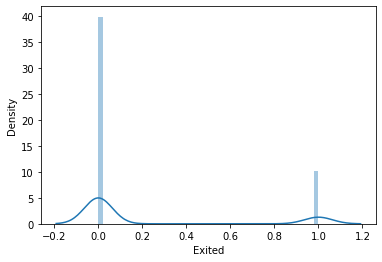

In [59]:
for col in df.select_dtypes('int64'):
    plt.figure()
    sns.distplot(df[col])

## C_Analyse bivariée <a name="analyse_b"></a>

Comment décrire votre score de crédit ?
Un score de crédit est un nombre compris entre 300 et 850 qui décrit la 
solvabilité d'un consommateur. Plus le score est élevé, plus l'emprunteur 
est bien perçu par les prêteurs potentiels. Le pointage de crédit est basé 
sur les antécédents de crédit : nombre de comptes ouverts, niveau d'endettement
total, historique de remboursement et autres facteurs.

Qu'est-ce qu'un pointage de crédit inacceptable ?
Qu'est-ce qu'un mauvais pointage de crédit ? Sur l'échelle FICO® Score☉ 8 de 300 à 850, l'un des scores de crédit les plus fréquemment utilisés par les prêteurs, un mauvais score de crédit est un score inférieur à 670. Plus précisément, un score compris entre 580 et 669 est considéré comme acceptable, et un score compris entre 300 et 579 est considéré comme mauvais.


Les Scores FICO® 
* Exceptionnel : 800 à 850
* Très bon : 740 à 799
* Bon : 670 à 739
* Moyen : 580 à 669
* Mauvais : 300 à 579

In [60]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             string
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

### a_ Création de Catégorie de variable <a name="variable_cat"></a>

###### cs_categories : regroupe 5 catégories de credit score selon l'échelle de FICO à savoir Mauvais, Moyen, Bon, Très bon, Exceptionnel
###### cs_number : regroupe 5 catégories de credit score selon l'échelle de FICO à savoir 1, 2, 3, 4 et 5
###### age_categorie : regroupe trois classe d'age à savoir jeune, adult, vieux
###### age_number : regroupe trois classe d'age à savoir 1, 2 et 3

In [61]:
def cs_categories(CreditScore):
    if CreditScore <= 579:
        return 'Mauvais'
    elif CreditScore >579 and CreditScore <= 669:
        return 'Moyen'
    elif CreditScore >669 and CreditScore <= 739:
        return 'Bon'
    elif CreditScore > 739 and CreditScore <= 799:
        return 'Très Bon'
    else: 
        return 'Excellent'

In [62]:
df['cs_categories']=df.apply(lambda x : cs_categories(x['CreditScore']), axis=1)

In [63]:
df['cs_categories'].unique()

array(['Moyen', 'Mauvais', 'Bon', 'Excellent', 'Très Bon'], dtype=object)

In [64]:
def cs_number(CreditScore):
    if CreditScore <= 579:
        return 1
    elif CreditScore >579 and CreditScore <= 669:
        return 2
    elif CreditScore >669 and CreditScore <= 739:
        return 3
    elif CreditScore > 739 and CreditScore <= 799:
        return 4
    else: 
        return 5

In [65]:
df['cs_number']=df.apply(lambda x : cs_number(x['CreditScore']), axis=1)

In [66]:
df["cs_number"].unique()

array([2, 1, 3, 5, 4], dtype=int64)

In [67]:
# df['cs_number']=df.apply(lambda x : cs_number(x['cs_number']), axis=1)

In [68]:
def age_categories(Age):
    if Age <= 19:
        return 'jeune'
    elif Age >19 and Age <= 59:
        return 'adulte'
    else: 
        return 'vieux'

In [69]:
df['age_categories']=df.apply(lambda x : age_categories(x['Age']), axis=1)

In [70]:
df["age_categories"].unique()

array(['adulte', 'vieux', 'jeune'], dtype=object)

In [71]:
print((df['Age'].min()), 'Age minimale')
print((df['Age'].max()), 'Age maximale')

18 Age minimale
92 Age maximale


In [72]:
def age_number(Age):
    if Age <= 19:
        return 1
    elif Age >19 and Age <= 59:
        return 2
    else: 
        return 3

In [73]:
df['age_number']=df.apply(lambda x : age_number(x['Age']), axis=1)

In [74]:
df["age_number"].unique()

array([2, 3, 1], dtype=int64)

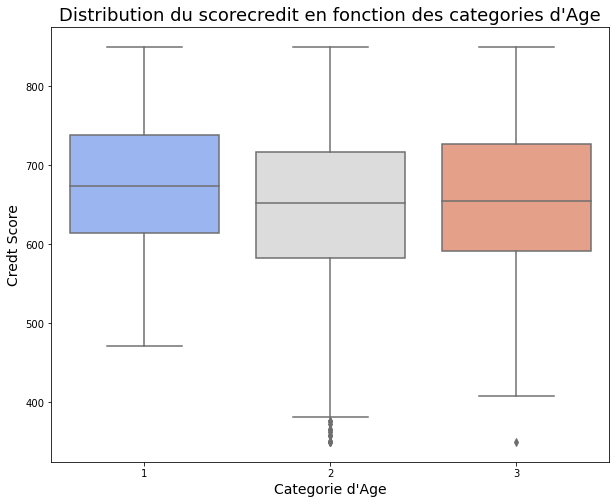

In [75]:
plt.figure(figsize=(10, 8))
# make boxplot with Seaborn
sns.boxplot(y='CreditScore', x='age_number', 
                 data=df, 
                 palette="coolwarm")
# Set labels and title
plt.ylabel("Credt Score", size=14)
plt.xlabel("Categorie d'Age", size=14)
plt.title("Distribution du scorecredit en fonction des categories d'Age", size=18)
plt.savefig("boxplot_AGE_PREMATURE.png")

In [76]:
var_cat

['Geography',
 'Gender',
 'Tenure',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'Exited']

In [77]:
var_cat_1=['Geography', 'Gender', 'Tenure','NumOfProducts','HasCrCard', 'IsActiveMember', 'cs_categories', 'age_categories', 'age_number', 'cs_number']

In [78]:
for i,j in enumerate(var_cat_1):
    print(i,j)

0 Geography
1 Gender
2 Tenure
3 NumOfProducts
4 HasCrCard
5 IsActiveMember
6 cs_categories
7 age_categories
8 age_number
9 cs_number


### b_ Analyse bi variée variables catégorielles & "Exited" <a name="Analyse_bi_variable_cat"></a>

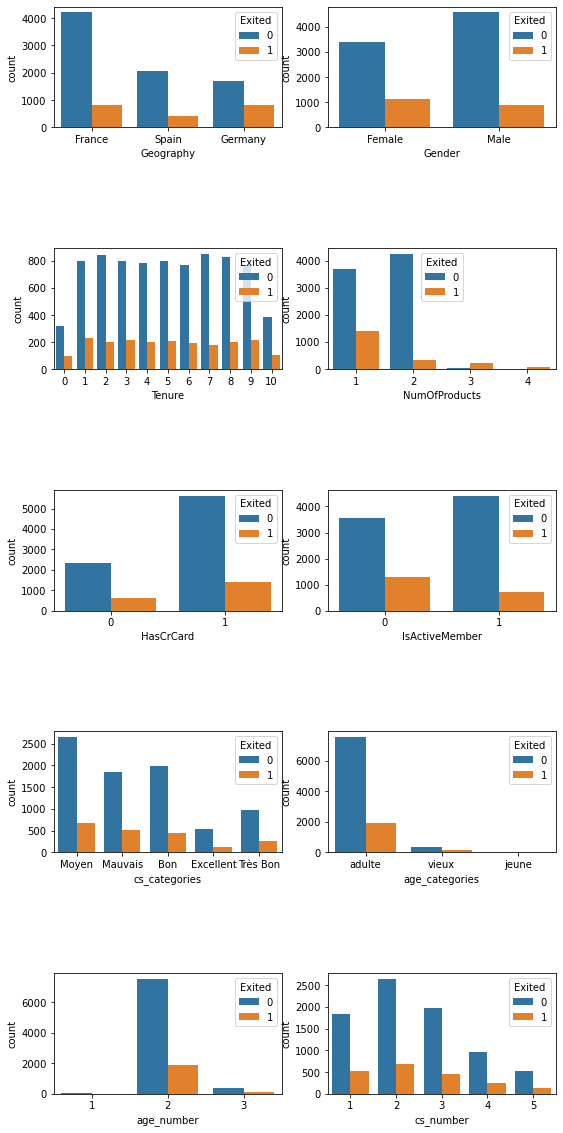

In [79]:
fig, axes=plt.subplots(5,2, figsize=(9,20)) #2 lignes, 2 colonnes et la taille de la figure
for idx, cat_col in enumerate(var_cat_1): # je declare une boucle ou idx parcours le numéro de la ligne et cat_col la colonne de chaque variable
    row, col=idx//2,idx%2 # distinguer les valeurs pairs et les valeurs impaires
    sns.countplot(x=cat_col, data=df,hue='Exited', ax=axes[row,col]) # 
plt.subplots_adjust(hspace=1) # ajustement selon l'espace disponible

### c_ Analyse des variables numériques <a name="Analyse_variable_num"></a>

In [80]:
df.corr()

RowNumber  CustomerId  CreditScore       Age    Tenure  \
RowNumber         1.000000    0.004202     0.005840  0.000783 -0.006495   
CustomerId        0.004202    1.000000     0.005308  0.009497 -0.014883   
CreditScore       0.005840    0.005308     1.000000 -0.003965  0.000842   
Age               0.000783    0.009497    -0.003965  1.000000 -0.009997   
Tenure           -0.006495   -0.014883     0.000842 -0.009997  1.000000   
Balance          -0.009067   -0.012419     0.006268  0.028308 -0.012254   
NumOfProducts     0.007246    0.016972     0.012238 -0.030680  0.013444   
HasCrCard         0.000599   -0.014025    -0.005458 -0.011721  0.022583   
IsActiveMember    0.012044    0.001665     0.025651  0.085472 -0.028362   
EstimatedSalary  -0.005988    0.015271    -0.001384 -0.007201  0.007784   
Exited           -0.016571   -0.006248    -0.027094  0.285323 -0.014001   
cs_number         0.006820    0.007072     0.947565 -0.000104 -0.001583   
age_number        0.003179   -0.001452     0.001672  0.631782 -0.004577   

                  Balance  NumOfProducts  HasCrCard  IsActiveMember  \
RowNumber       -0.009067       0.007246   0.000599        0.012044   
CustomerId      -0.012419       0.016972  -0.014025        0.001665   
CreditScore      0.006268       0.012238  -0.005458        0.025651   
Age              0.028308      -0.030680  -0.011721        0.085472   
Tenure          -0.012254       0.013444   0.022583       -0.028362   
Balance          1.000000      -0.304180  -0.014858       -0.010084   
NumOfProducts   -0.304180       1.000000   0.003183        0.009612   
HasCrCard       -0.014858       0.003183   1.000000       -0.011866   
IsActiveMember  -0.010084       0.009612  -0.011866        1.000000   
EstimatedSalary  0.012797       0.014204  -0.009933       -0.011421   
Exited           0.118533      -0.047820  -0.007138       -0.156128   
cs_number        0.007208       0.016119  -0.002812        0.023848   
age_number      -0.004143      -0.004321   0.000445        0.120308   

                 EstimatedSalary    Exited  cs_number  age_number  
RowNumber              -0.005988 -0.016571   0.006820    0.003179  
CustomerId              0.015271 -0.006248   0.007072   -0.001452  
CreditScore            -0.001384 -0.027094   0.947565    0.001672  
Age                    -0.007201  0.285323  -0.000104    0.631782  
Tenure                  0.007784 -0.014001  -0.001583   -0.004577  
Balance                 0.012797  0.118533   0.007208   -0.004143  
NumOfProducts           0.014204 -0.047820   0.016119   -0.004321  
HasCrCard              -0.009933 -0.007138  -0.002812    0.000445  
IsActiveMember         -0.011421 -0.156128   0.023848    0.120308  
EstimatedSalary         1.000000  0.012097  -0.001140   -0.006929  
Exited                  0.012097  1.000000  -0.019685    0.049485  
cs_number              -0.001140 -0.019685   1.000000    0.006337  
age_number             -0.006929  0.049485   0.006337    1.000000

#### tres peu de variables sont correlées entre elles. Etudions la matrice ci dessous

<AxesSubplot:>

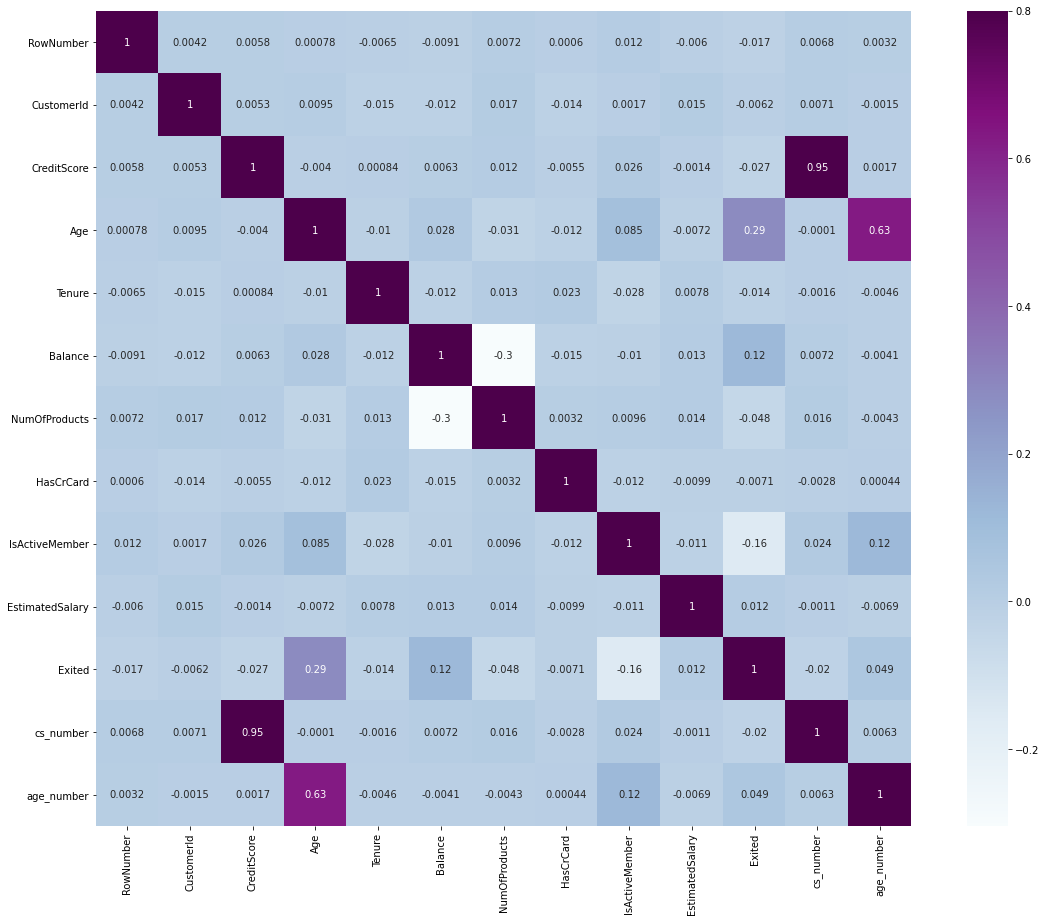

In [81]:
matrix=df.corr()
f,ax=plt.subplots(figsize=(20,15))
sns.heatmap(matrix, vmax=.8,square=True,cmap='BuPu',annot=True)

#### les variables catégorielles crées sont correlées aux variables referentes.

In [88]:
# sns.clustermap(df.corr())

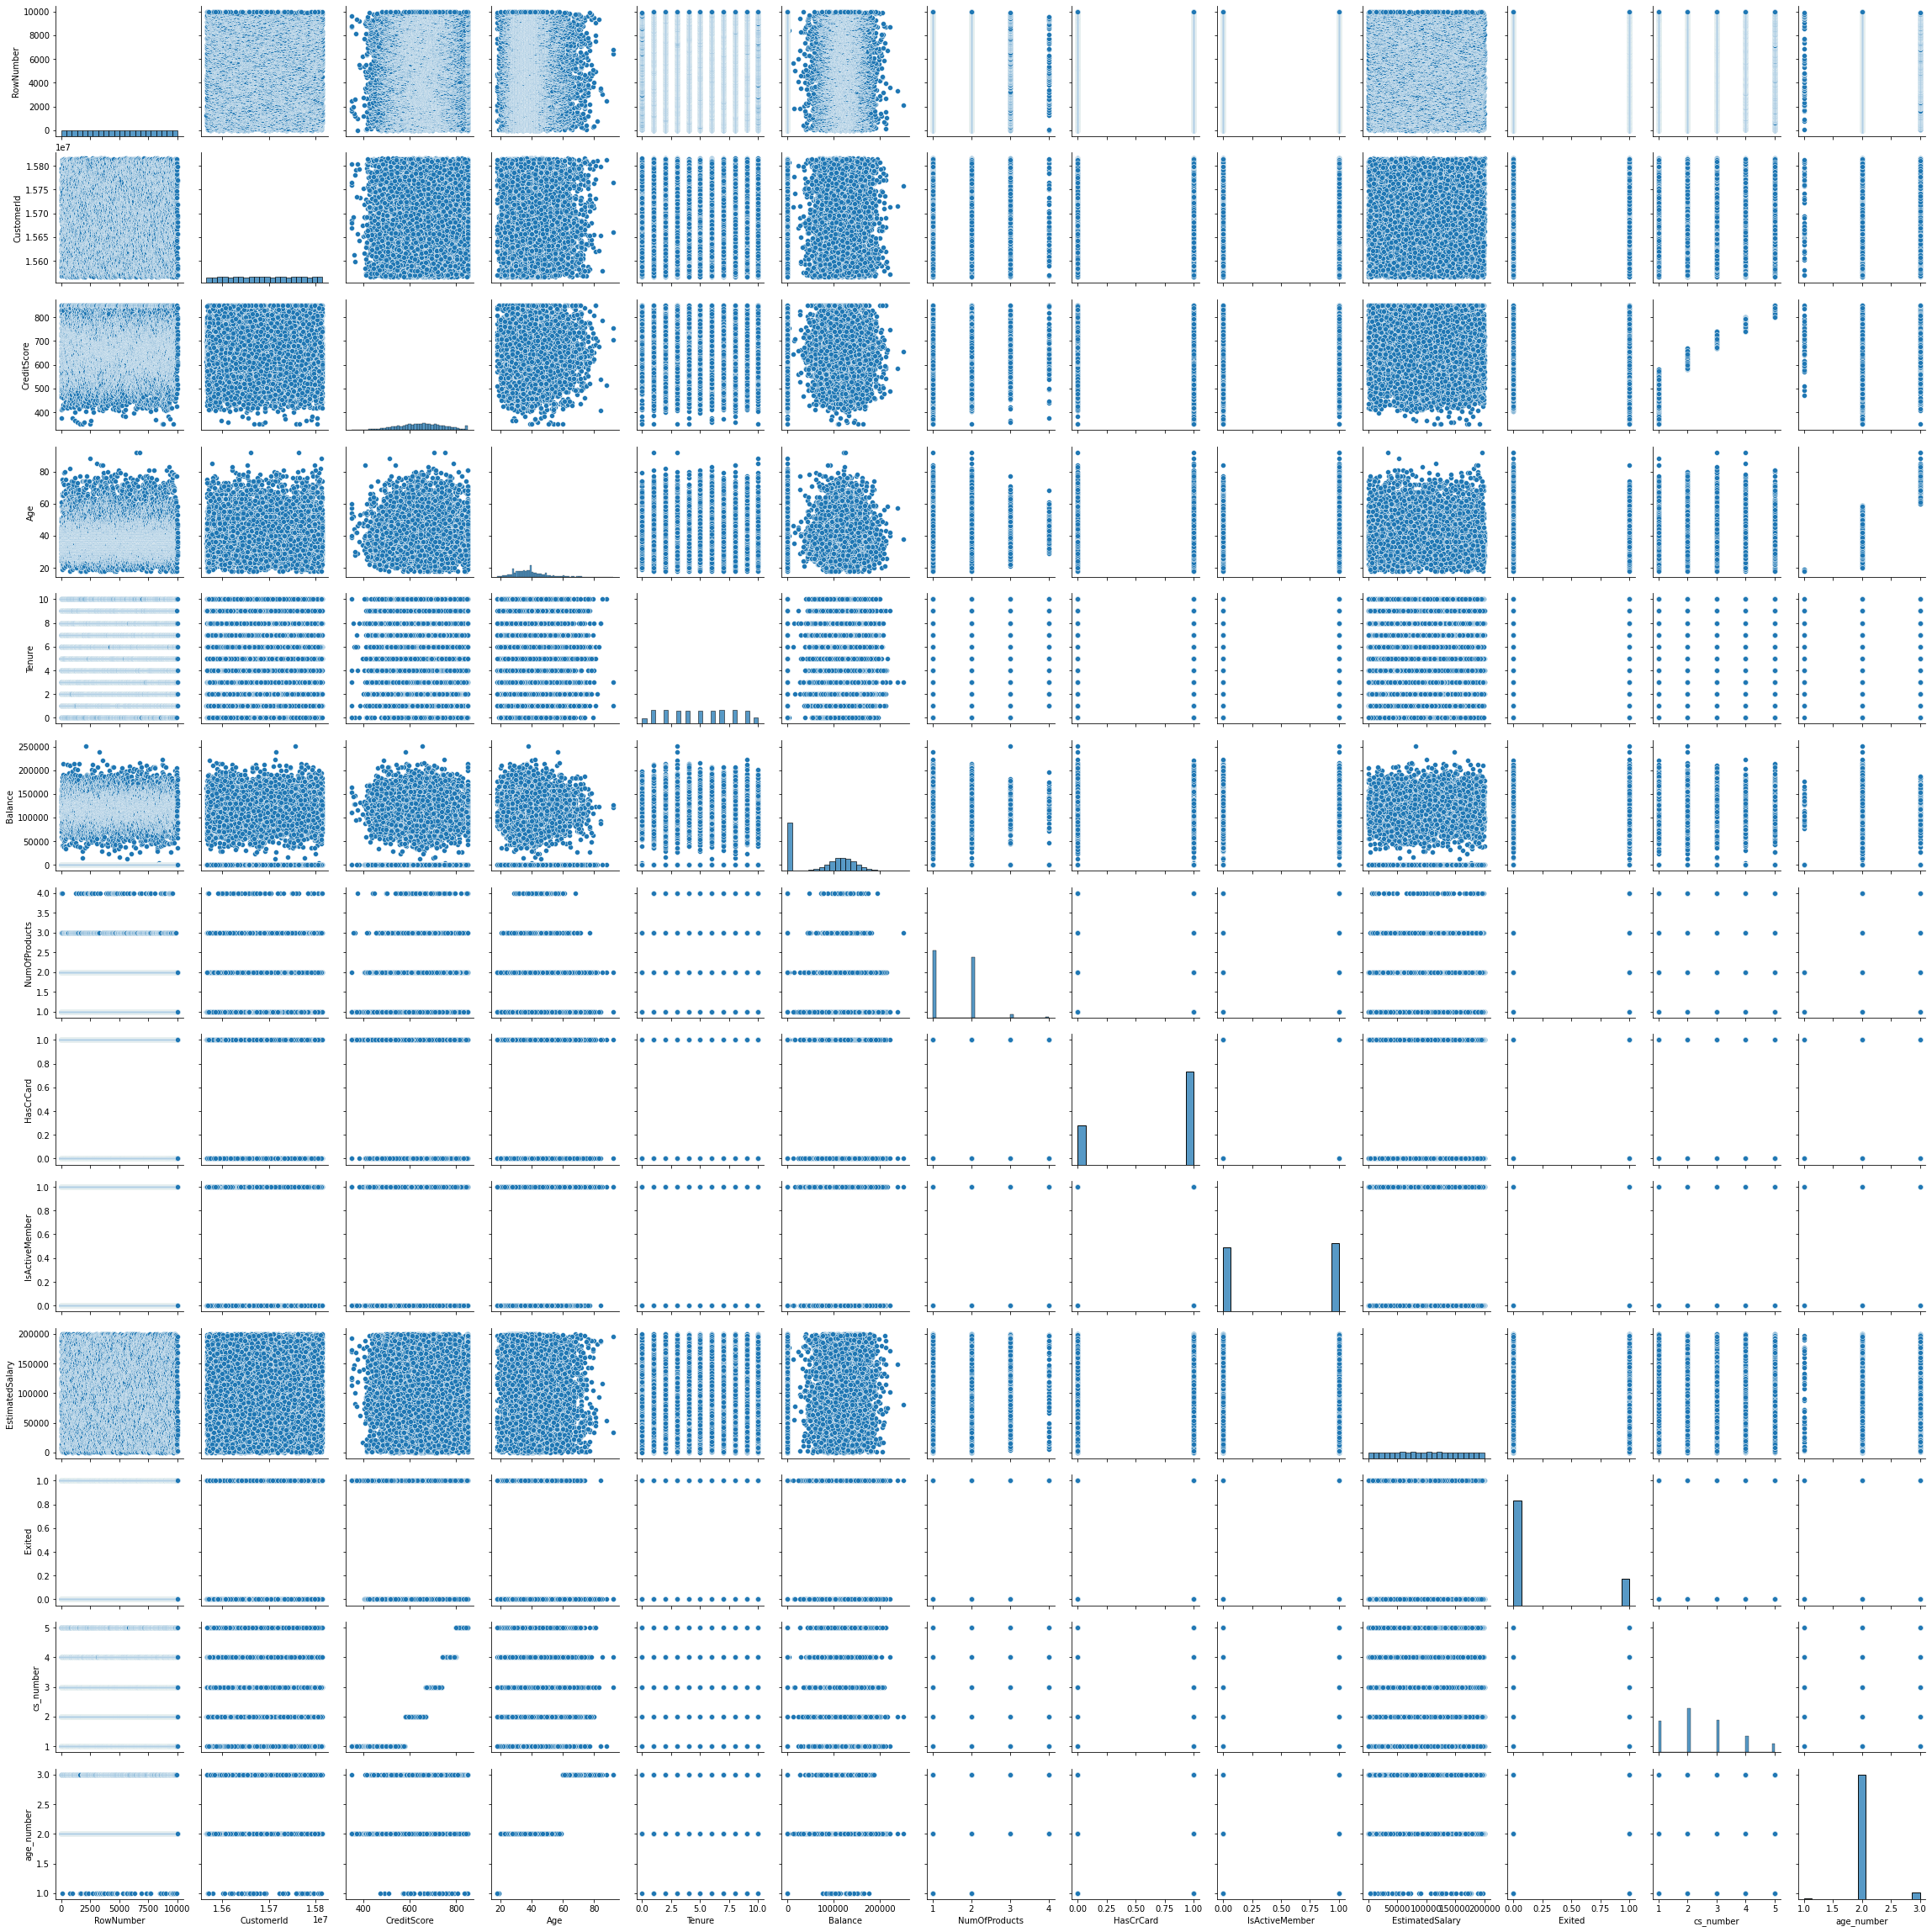

In [ ]:
# sns.pairplot(df)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


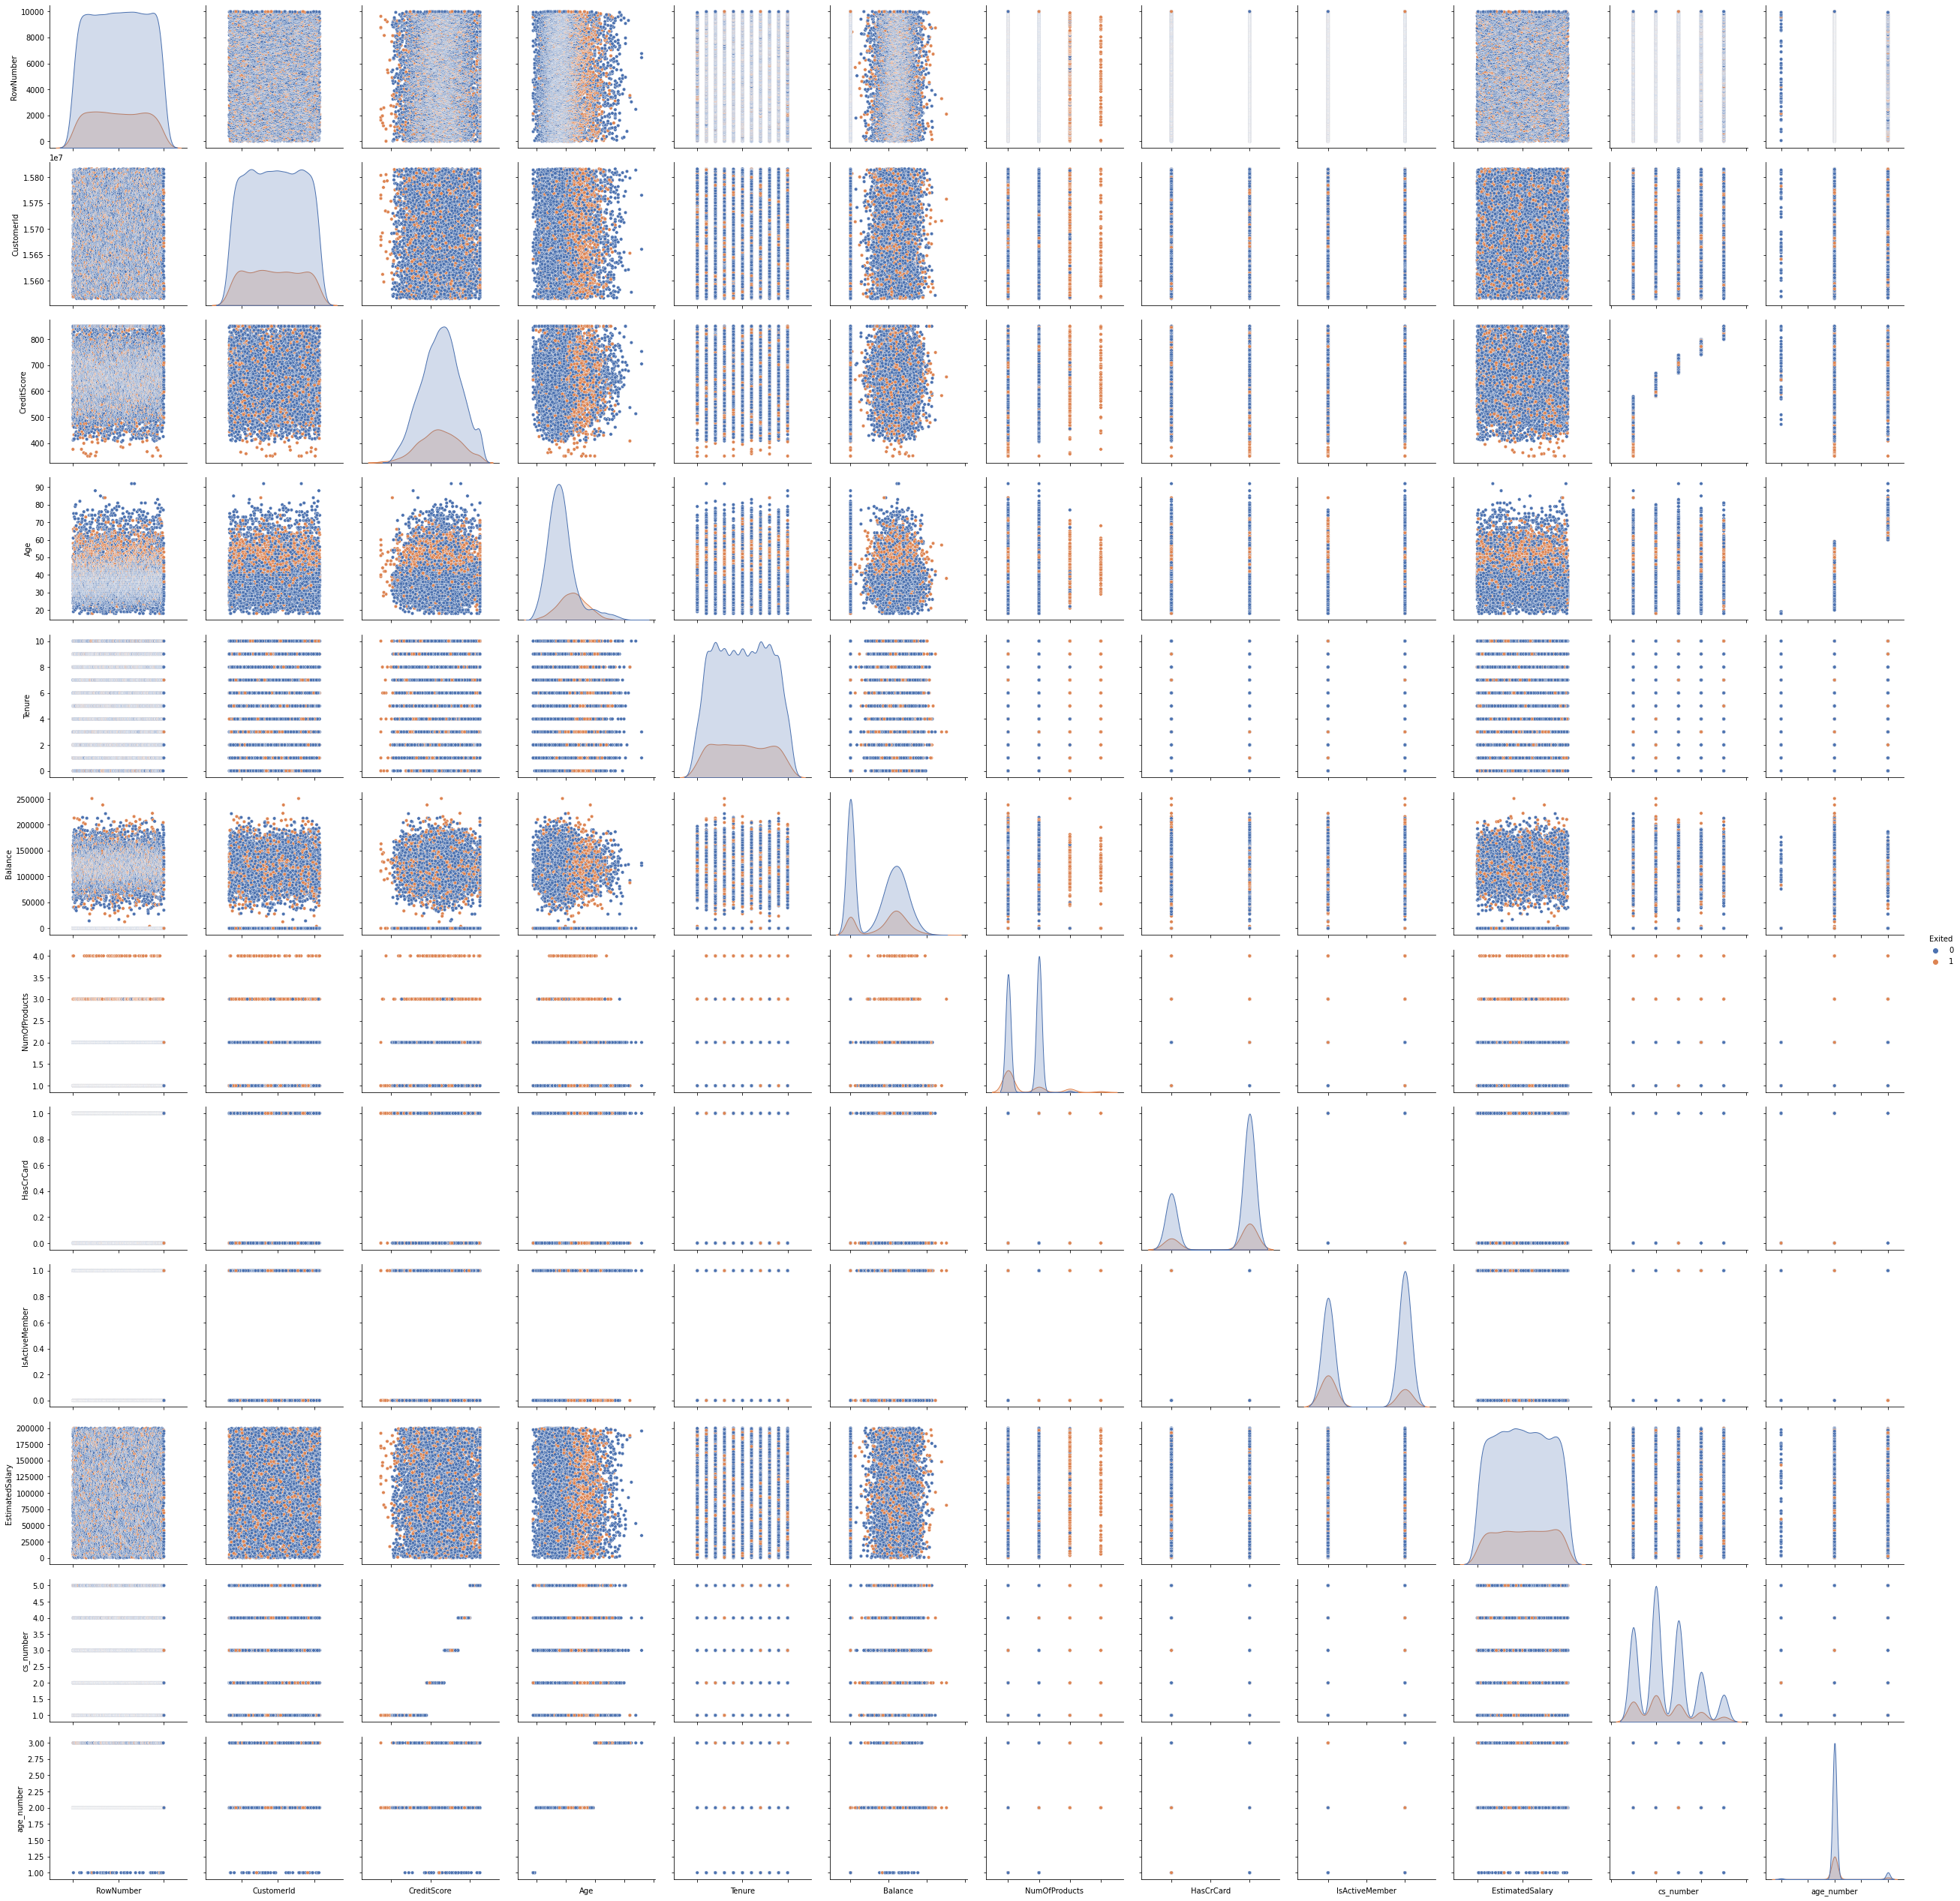

In [ ]:
#pair plots of entire dataset
#pp = sns.pairplot(df, hue = 'Exited', palette = 'deep', 
                  #size=3, diag_kind = 'kde', diag_kws=dict(shade=True), plot_kws=dict(s=20) )
#pp.set(xticklabels=[])

# 4_ T-Test HYPOTHESES <a name="test_hypotheses"></a>
* H0 : la balance influence t'elle la decision du client de quitter la banque ou non?
* H1: Le CreditScore est-il une mesure de fiabilité pour la banque?
* H2 : l'Age influence t'elle la decision du client de quitter la banque ou non?

# 5_CREATION DE MODELE <a name="creation_modele"></a>

In [82]:
var_cat_1

['Geography',
 'Gender',
 'Tenure',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'cs_categories',
 'age_categories',
 'age_number',
 'cs_number']

In [83]:
var_cat_2=['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'cs_categories', 'age_categories', 'age_number', 'cs_number', 'Tenure','NumOfProducts', 'Exited']

In [84]:
var_cat_2=df[var_cat_2]
var_cat_2

Geography  Gender  HasCrCard  IsActiveMember cs_categories  \
0       France  Female          1               1         Moyen   
1        Spain  Female          0               1         Moyen   
2       France  Female          1               0       Mauvais   
3       France  Female          0               0           Bon   
4        Spain  Female          1               1     Excellent   
...        ...     ...        ...             ...           ...   
9995    France    Male          1               0      Très Bon   
9996    France    Male          1               1       Mauvais   
9997    France  Female          0               1           Bon   
9998   Germany    Male          1               0      Très Bon   
9999    France  Female          1               0      Très Bon   

     age_categories  age_number  cs_number  Tenure  NumOfProducts  Exited  
0            adulte           2          2       2              1       1  
1            adulte           2          2       1              1       0  
2            adulte           2          1       8              3       1  
3            adulte           2          3       1              2       0  
4            adulte           2          5       2              1       0  
...             ...         ...        ...     ...            ...     ...  
9995         adulte           2          4       5              2       0  
9996         adulte           2          1      10              1       0  
9997         adulte           2          3       7              1       1  
9998         adulte           2          4       3              2       1  
9999         adulte           2          4       4              1       0  

[10000 rows x 11 columns]

In [85]:
remove = ['cs_categories', 'age_categories','age_number','cs_number']
var_cat_2= var_cat_2[var_cat_2.columns.difference(remove)]

In [86]:
var_cat_2

Exited  Gender Geography  HasCrCard  IsActiveMember  NumOfProducts  \
0          1  Female    France          1               1              1   
1          0  Female     Spain          0               1              1   
2          1  Female    France          1               0              3   
3          0  Female    France          0               0              2   
4          0  Female     Spain          1               1              1   
...      ...     ...       ...        ...             ...            ...   
9995       0    Male    France          1               0              2   
9996       0    Male    France          1               1              1   
9997       1  Female    France          0               1              1   
9998       1    Male   Germany          1               0              2   
9999       0  Female    France          1               0              1   

      Tenure  
0          2  
1          1  
2          8  
3          1  
4          2  
...      ...  
9995       5  
9996      10  
9997       7  
9998       3  
9999       4  

[10000 rows x 7 columns]

In [87]:
var_cat_2=pd.get_dummies(var_cat_2,drop_first=True)
var_cat_2

Exited  HasCrCard  IsActiveMember  NumOfProducts  Tenure  Gender_Male  \
0          1          1               1              1       2            0   
1          0          0               1              1       1            0   
2          1          1               0              3       8            0   
3          0          0               0              2       1            0   
4          0          1               1              1       2            0   
...      ...        ...             ...            ...     ...          ...   
9995       0          1               0              2       5            1   
9996       0          1               1              1      10            1   
9997       1          0               1              1       7            0   
9998       1          1               0              2       3            1   
9999       0          1               0              1       4            0   

      Geography_Germany  Geography_Spain  
0                     0                0  
1                     0                1  
2                     0                0  
3                     0                0  
4                     0                1  
...                 ...              ...  
9995                  0                0  
9996                  0                0  
9997                  0                0  
9998                  1                0  
9999                  0                0  

[10000 rows x 8 columns]

In [88]:
var_num

['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Balance', 'EstimatedSalary']

In [89]:
var_num=df[var_num]
var_num

RowNumber  CustomerId  CreditScore  Age    Balance  EstimatedSalary
0             1    15634602          619   42       0.00        101348.88
1             2    15647311          608   41   83807.86        112542.58
2             3    15619304          502   42  159660.80        113931.57
3             4    15701354          699   39       0.00         93826.63
4             5    15737888          850   43  125510.82         79084.10
...         ...         ...          ...  ...        ...              ...
9995       9996    15606229          771   39       0.00         96270.64
9996       9997    15569892          516   35   57369.61        101699.77
9997       9998    15584532          709   36       0.00         42085.58
9998       9999    15682355          772   42   75075.31         92888.52
9999      10000    15628319          792   28  130142.79         38190.78

[10000 rows x 6 columns]

In [90]:
df_encoded=pd.concat([var_cat_2,var_num],axis=1)
df_encoded

Exited  HasCrCard  IsActiveMember  NumOfProducts  Tenure  Gender_Male  \
0          1          1               1              1       2            0   
1          0          0               1              1       1            0   
2          1          1               0              3       8            0   
3          0          0               0              2       1            0   
4          0          1               1              1       2            0   
...      ...        ...             ...            ...     ...          ...   
9995       0          1               0              2       5            1   
9996       0          1               1              1      10            1   
9997       1          0               1              1       7            0   
9998       1          1               0              2       3            1   
9999       0          1               0              1       4            0   

      Geography_Germany  Geography_Spain  RowNumber  CustomerId  CreditScore  \
0                     0                0          1    15634602          619   
1                     0                1          2    15647311          608   
2                     0                0          3    15619304          502   
3                     0                0          4    15701354          699   
4                     0                1          5    15737888          850   
...                 ...              ...        ...         ...          ...   
9995                  0                0       9996    15606229          771   
9996                  0                0       9997    15569892          516   
9997                  0                0       9998    15584532          709   
9998                  1                0       9999    15682355          772   
9999                  0                0      10000    15628319          792   

      Age    Balance  EstimatedSalary  
0      42       0.00        101348.88  
1      41   83807.86        112542.58  
2      42  159660.80        113931.57  
3      39       0.00         93826.63  
4      43  125510.82         79084.10  
...   ...        ...              ...  
9995   39       0.00         96270.64  
9996   35   57369.61        101699.77  
9997   36       0.00         42085.58  
9998   42   75075.31         92888.52  
9999   28  130142.79         38190.78  

[10000 rows x 14 columns]

In [91]:
remove_1 = ['RowNumber','CustomerId']
df_encoded= df_encoded[df_encoded.columns.difference(remove_1)]

In [116]:
y=df_encoded['Exited']
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [117]:
y.shape

(10000,)

In [118]:
x=df_encoded.drop('Exited',axis=1 )
x

Age    Balance  CreditScore  EstimatedSalary  Gender_Male  \
0      42       0.00          619        101348.88            0   
1      41   83807.86          608        112542.58            0   
2      42  159660.80          502        113931.57            0   
3      39       0.00          699         93826.63            0   
4      43  125510.82          850         79084.10            0   
...   ...        ...          ...              ...          ...   
9995   39       0.00          771         96270.64            1   
9996   35   57369.61          516        101699.77            1   
9997   36       0.00          709         42085.58            0   
9998   42   75075.31          772         92888.52            1   
9999   28  130142.79          792         38190.78            0   

      Geography_Germany  Geography_Spain  HasCrCard  IsActiveMember  \
0                     0                0          1               1   
1                     0                1          0               1   
2                     0                0          1               0   
3                     0                0          0               0   
4                     0                1          1               1   
...                 ...              ...        ...             ...   
9995                  0                0          1               0   
9996                  0                0          1               1   
9997                  0                0          0               1   
9998                  1                0          1               0   
9999                  0                0          1               0   

      NumOfProducts  Tenure  
0                 1       2  
1                 1       1  
2                 3       8  
3                 2       1  
4                 1       2  
...             ...     ...  
9995              2       5  
9996              1      10  
9997              1       7  
9998              2       3  
9999              1       4  

[10000 rows x 11 columns]

In [119]:
x.shape

(10000, 11)

# 6_ REGRESSIONS <a name="Regression"></a>

In [121]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [122]:
# importer 
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier


# Random forest 

#### spécifions la partie test et la partie train 

In [123]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=20)

### A_ LogisticRegression <a name="Regression_logistique"></a>

In [124]:
clr= LogisticRegression()
clr.fit(x_train, y_train)
score_clr = clr.score(x_test,y_test)
print('Accuracy LogisticRegression :', score_clr)

Accuracy LogisticRegression : 0.803


###### Selon la regression, nous pouvons affirmer que le modele est précis a 80%. Il y a donc 80% de chance que la décision qui sera prise soit la bonne.

### B_ Random Forest Classifier <a name="Regression_RFC"></a>

In [126]:
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
score_randomforest = randomforest.score(x_test,y_test)
print('Accuracy random forest :', score_randomforest)

Accuracy random forest : 0.8755


###### Selon la regression, nous pouvons affirmer que le modele est précis a 88%. Il y a donc 88% de chance que la décision qui sera prise soit la bonne.

### C_ K-Nearest Neighbors <a name="Regression_knn"></a>

In [127]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
#y_pred = knn.predict(X_test)
score_knn = knn.score(x_test,y_test)
print('Accuracy KNN:',score_knn)

Accuracy KNN: 0.7705


###### Selon la regression, nous pouvons affirmer que le modele est précis a 77%. Il y a donc 77% de chance que la décision qui sera prise soit la bonne.

### D_ GaussianNB <a name="Regression_gaussianNB"></a>

In [128]:
from sklearn.naive_bayes import GaussianNB

gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
# y_pred = gaussian.predict(X_test)
score_gaussian = gaussian.score(x_test,y_test)
print('Accuracy:', score_gaussian)

Accuracy: 0.7925


###### Selon la regression, nous pouvonsnous pouvons affirmer que le modele est précis a 79%. Il y a donc 79% de chance que la décision qui sera prise soit la bonne.

### E_ SVC (support vector classifier) <a name="Regression_svc"></a>

In [129]:
from sklearn import svm
from sklearn.svm import SVC

svm = SVC()
svm.fit(x_train, y_train)
score_svm = svm.score(x_test,y_test)
print('Accuracy svm :', score_svm)

Accuracy svm : 0.8115


###### Selon la regression, nous pouvons affirmer que le modele est précis a 81%. Il y a donc 81% de chance que la décision qui sera prise soit la bonne.

### XG_BOOST <a name="xg_boost"></a>

In [130]:
from xgboost import XGBClassifier

xg_boost = XGBClassifier(random_state=0)
xg_boost.fit(x_train, y_train)
score_xg_boost = xg_boost.score(x_test,y_test)
print('Accuracy xg_boost :', score_xg_boost)

Accuracy xg_boost : 0.865


###### Selon la regression, nous pouvons nous pouvons affirmer que le modele est précis a 81%. Il y a donc 81% de chance que la décision qui sera prise soit la bonne.

### F_ MODELE_ACCURACY <a name="Accuracy"></a>

In [131]:
all_model={'clr':score_clr, 'rf':score_randomforest, 'knn':score_knn, 'gaus':score_gaussian, 'svm':score_svm, 'xgB':score_xg_boost}
print(all_model)

{'clr': 0.803, 'rf': 0.8755, 'knn': 0.7705, 'gaus': 0.7925, 'svm': 0.8115, 'xgB': 0.865}


In [132]:
for k, v in sorted(all_model.items(), key=lambda x: x[1], reverse=True):
    print("Accuracy du modele %s = %s" % (k, v))

Accuracy du modele rf = 0.8755
Accuracy du modele xgB = 0.865
Accuracy du modele svm = 0.8115
Accuracy du modele clr = 0.803
Accuracy du modele gaus = 0.7925
Accuracy du modele knn = 0.7705


###### Selon le resumé des accuracy de toutes nos regressions, nous pouvons affirmer que le modele le plus précis est le modele rf à savoir Random Forest avec 88% de chance de prédire la bonne réponse suivi par le modele xgB (xg_Boost) dont le pourcentage de prédire la bonne reponse est de 87% soit 01% de différence entre les deux modeles. Il y a donc 88% à 87% de chance que la décision qui sera prise (la prédiction) soit la bonne.

# 7_ REPRESENTATION GRAPHIQUE DES MODELES : BOXPLOT <a name="Regression_Boxplot"></a>

In [133]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

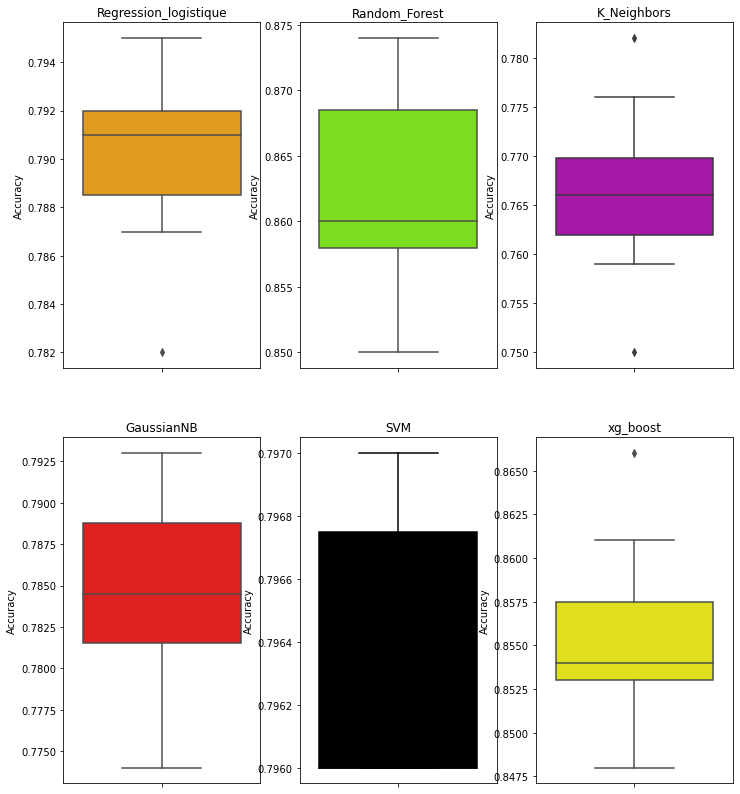

In [134]:
score_regL = cross_val_score(clr, x, y, cv=10, scoring="accuracy") 
score_rf = cross_val_score(randomforest, x, y, cv=10, scoring="accuracy") 
score_knn = cross_val_score(knn, x, y, cv=10, scoring="accuracy")
score_gauss = cross_val_score(gaussian, x, y, cv=10, scoring="accuracy") 
score_svm = cross_val_score(svm, x, y, cv=10, scoring="accuracy")
score_xg_boost = cross_val_score(xg_boost, x, y, cv=10, scoring="accuracy") 
  
fig, axes = plt.subplots(2, 3, figsize=(12, 14)) 


graph_reg = sns.boxplot(ax=axes[0,0],  y=score_regL, color = "orange")
graph_reg.set(ylabel = "Accuracy")
graph_reg.set(title = "Regression_logistique")


graph_rf = sns.boxplot(ax=axes[0,1],  y=score_rf, color = "lawngreen")
graph_rf.set(ylabel = "Accuracy")
graph_rf.set(title = "Random_Forest")


graph_knn= sns.boxplot(ax=axes[0,2],  y=score_knn, color = "m")
graph_knn.set(ylabel = "Accuracy")
graph_knn.set(title = "K_Neighbors")


graph_gauss = sns.boxplot(ax=axes[1,0],  y=score_gauss, color = "r")
graph_gauss.set(ylabel = "Accuracy")
graph_gauss.set(title = "GaussianNB")


graph_svm= sns.boxplot(ax=axes[1,1],  y=score_svm,color = "black")
graph_svm.set(ylabel = "Accuracy")
graph_svm.set(title = "SVM")

graph_xg_boost= sns.boxplot(ax=axes[1,2],  y=score_xg_boost,color = "yellow")
graph_xg_boost.set(ylabel = "Accuracy")
graph_xg_boost.set(title = "xg_boost")


plt.show()

#### Au regard des accuracy des differents modeles de regression, nous allons retenir le modele avec la plus grande accuracy à savoir le Random Forest.

#### Ce modele prédit à 88% la probabilité que le client quittera (Exited) ou restera (don't Exited) au sein de la banque.

# 8_ MODELE RETENUE <a name="Modele_retenue"></a>

In [135]:
from joblib import dump, load

dump(randomforest, 'random_forest_saved.joblib')

['random_forest_saved.joblib']

In [136]:
rf_loaded = load('random_forest_saved.joblib')

In [137]:
# tester le modele
pred=randomforest.predict(x_test)
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [138]:
pred=rf_loaded.predict(x_test)
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [139]:
y_test

9957    0
1687    0
2116    0
231     0
2780    0
       ..
7176    0
5050    0
7910    0
7023    0
2054    0
Name: Exited, Length: 2000, dtype: int64

# 9_ CONFUSION MATRIX <a name="Confusion_matrix"></a>

In [140]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
# from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

import seaborn as sns
import numpy as np

In [141]:
confusion_m = confusion_matrix(y_test, pred)
print(confusion_m)

[[1571   52]
 [ 197  180]]


In [142]:
TP = confusion_m[1, 1]
TN = confusion_m[0, 0]
FP = confusion_m[0, 1]
FN = confusion_m[1, 0]

In [143]:
print((TP + TN) / (TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, pred))

0.8755
0.8755


In [144]:
print((FP + FN) / (TP + TN + FP + FN))
print(1 - metrics.accuracy_score(y_test, pred))

0.1245
0.12450000000000006


In [145]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93      1623
           1       0.78      0.48      0.59       377

    accuracy                           0.88      2000
   macro avg       0.83      0.72      0.76      2000
weighted avg       0.87      0.88      0.86      2000



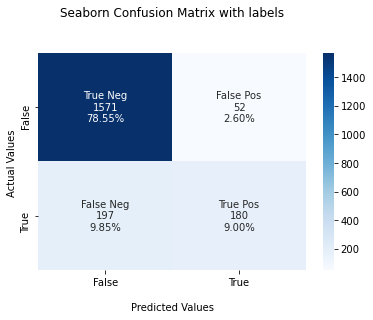

In [146]:
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                confusion_m.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     confusion_m.flatten()/np.sum(confusion_m)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(confusion_m, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

# 10_ EXEMPLE DE PREDICTION <a name="exemple_prediction"></a>

In [147]:
x.columns

Index(['Age', 'Balance', 'CreditScore', 'EstimatedSalary', 'Gender_Male',
       'Geography_Germany', 'Geography_Spain', 'HasCrCard', 'IsActiveMember',
       'NumOfProducts', 'Tenure'],
      dtype='object')

In [148]:
# création de modèele pour la prédiction 
profil_test=[[28,1500,650,1500,0,1,0,0,0,1,0]]
randomforest.predict(profil_test)

array([0], dtype=int64)

#### *interpretation de la prédiction : selon les information fournies, le client ne quittera pas la banque (don't Exited)*

# 11_ FEATURE IMPORTANCE <a name="feature_importance"></a>

In [149]:
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [150]:
reg = LassoCV()
reg.fit(x, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(x,y))
coef = pd.Series(reg.coef_, index = x.columns)

Best alpha using built-in LassoCV: 2.978634
Best score using built-in LassoCV: 0.014162


In [151]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 2 variables and eliminated the other 9 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

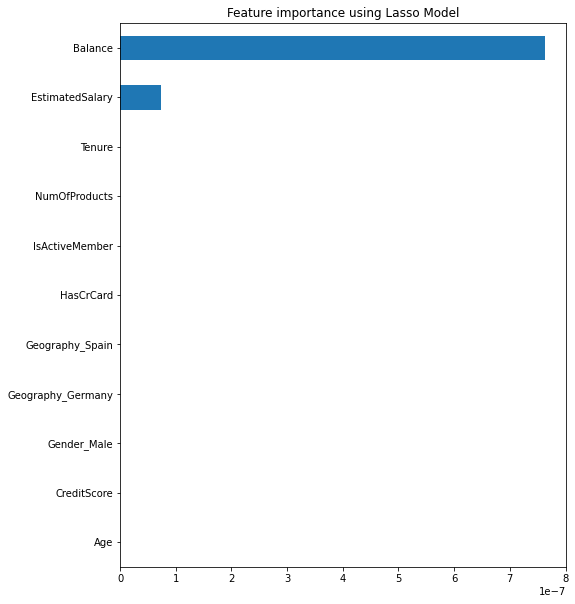

In [152]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

#### Au regard de notre Feature importance using lasso Model, les deux variables susceptibles d'influer la décision du client de quitter (Exited) ou des rester (Don't Exited) à la banque sont la Balance et le Salaire Estimé.

# 12_ CREATION D'APPLICATION WEB DU MODEL RETENUE <a name="api_web"></a>

## stocker le modèle prédictif ou enregistrer le modèle prédictif pour pourvoir l'utiliser dans notre application web

In [153]:
import pickle

In [154]:
pickle.dump(randomforest,open('prediction_Exited.pkl','wb'))

# 13_ DASHBOARD INTERACTIF <a name="Dashboard"></a>

In [1]:
from IPython.core.display import display, HTML
display(HTML("""<iframe title="dashboard markting bcaire - Page 1" width="1400" height="873.5" src="https://app.powerbi.com/view?r=eyJrIjoiMmJhOWNjNzctOWYzZS00M2ExLWI4NzgtMWQwNTBkMmM3ZGU5IiwidCI6ImVmNDZiZTU1LTE4YTUtNGJmOS1iMTJmLTJjMDA5MjJjM2NiMyIsImMiOjl9" frameborder="0" allowFullScreen="true"></iframe>>"""))

C:\Users\smosa\AppData\Local\Temp\ipykernel_46548\976332503.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [156]:
y_test.shape

(2000,)

In [157]:
x_test.shape

(2000, 11)